<h1 style="text-align: center;"> FINAL PROJECT </h1>
<h2 style="text-align: center;"> Dự đoán điểm IT001 từ dữ liệu làm bài trên WECODE </h2>

---

#### Lớp: CS114.P21

#### Thành viên nhóm

1. Nguyễn Chí Cường - 23520199
2. Hứa Mạnh Tân - 23521396
3. Nguyễn Tấn Tài - 23521376

---

## 1. Chuẩn bị dữ liệu và một số thông tin về bộ dữ liệu

### 1.1. Import thư viện cần thiết

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform

### 1.2. Load bộ dữ liệu

In [2]:
# Đường dẫn đến các tập dữ liệu
WECODE_DATASET = "./dataset/annonimized.csv"
SCORE_DATASET = "./dataset/ck-public.csv"
BASE_OUTPUT_DIR = "./output/ck/"

In [3]:
wecode_df = pd.read_csv(WECODE_DATASET).rename(
    columns={
        "concat('it001',`assignment_id`)": "assignment_id",
        "concat('it001',`problem_id`)": "problem_id",
        "concat('it001', username)": "username",
        "concat('it001',`language_id`)": "language_id",
    }
)

score_df = (
    pd.read_csv(SCORE_DATASET)
    .rename(columns={"hash": "username", "CK": "score"})
    .replace(r"^\s*$", "", regex=True)
)

### 1.3. Thông tin bộ dữ liệu

#### 1.3.1. Thông tin bộ dữ liệu làm bài tập Wecode của sinh viên

In [4]:
wecode_df.head(10)

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
5,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:29:03,10-09 09:30:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
6,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:29:58,10-09 09:30:08,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
7,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:32:17,10-09 09:42:54,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."
8,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:33:36,10-09 09:33:36,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."
9,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:34:05,10-09 09:34:05,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."


In [5]:
wecode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   assignment_id  295198 non-null  object
 1   problem_id     295198 non-null  object
 2   username       295198 non-null  object
 3   is_final       295198 non-null  int64 
 4   status         295198 non-null  object
 5   pre_score      295198 non-null  int64 
 6   coefficient    295198 non-null  int64 
 7   language_id    295198 non-null  object
 8   created_at     295198 non-null  object
 9   updated_at     295198 non-null  object
 10  judgement      295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [6]:
wecode_df.nunique()

assignment_id       203
problem_id          469
username           1489
is_final              2
status                4
pre_score           631
coefficient           4
language_id           6
created_at       284530
updated_at       242976
judgement         58406
dtype: int64

Từ thông tin trên thì ta có thể nhận thấy ngay bộ dữ liệu không hề có cột nào bị bỏ trống (tất cả các cột đều có 295198 giá trị là non-null), nên ta không cần phải xử lí dữ liệu khuyết thiết cho dữ liệu này. 

Những ta dễ thấy, các đặc trưng của dữ liệu này không mang giá trị đánh giá chung về khả năng của sinh viên, mà nó chỉ chứa thông tin về những lần nộp bài wecode của sinh viên một các rời rạc, lẻ tẻ. Vì vậy, chúng cần phải được tổng hợp lại và thay thế bằng những đặc trưng mới có giá trị đánh giá hoạt động học tập của sinh viên (ví dụ: tổng điểm của các bài wecode, số lần thử nộp bài, số bài đã giải, ...). Và từ đó ta có thể xây dựng các mô hình dự đoán điểm quá trình, thực hành và cuối kì dựa trên các đặc trưng mới này hiệu quả hơn.

#### 1.3.2. Thông tin bộ dữ liệu điểm của sinh viên

In [7]:
score_df.head(10)

,username,score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0
5,0155f91fe242fe55e1af631b0f0afbe9938b185c,4.0
6,016f87a7bd87f233a8633fba8a1ca7ef5c3c63c1,6.5
7,017ec1bbad0d598e5a86ac3bd595b870b6456e61,4.0
8,01ad03ec301749c033155fc17e657cc767d447c8,5.5
9,020ef1c31cb4751bbfa1a88fba782db3c402e2fa,5.0


In [8]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   username  761 non-null    object 
 1   score     755 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [9]:
score_df.nunique()

username    761
score        21
dtype: int64

## 2. Trích xuất đặc trưng từ dữ liệu gốc để tạo dữ liệu mới

### 2.1. Trích xuất đặc trưng

Như đã phân tích ở phần 1 thì tập dữ liệu wecode hiện tại không thể được dùng trực tiếp để đánh giá năng lực học tập của sinh viên. Nó là một bản ghi log thông tin các lần nộp bài của sinh viên trên wecode. Do đó, cần phải tổng hợp các đặc trưng hiện tại và trích xuất ra thành các đặt trưng mới có giá trị đánh giá năng lực học tập của sinh viên hơn.

In [10]:
# total_submissions, total_correct_submissions, number_of_tried_problems, number_of_solved_problems, number_of_tried_assignments
# total_weighted_final_score, score_per_submission, accuracy, submission_per_problem, avg_compilation_errors_per_problem, avg_duration_between_submission, first_try_success_rate

wecode_df["created_at"] = pd.to_datetime(
    wecode_df["created_at"], format="%m-%d %H:%M:%S", errors="coerce"
)
wecode_df["updated_at"] = pd.to_datetime(
    wecode_df["updated_at"], format="%m-%d %H:%M:%S", errors="coerce"
)
wecode_df["weighted_pre_score"] = (
    wecode_df["coefficient"] * wecode_df["pre_score"] / 100
)
wecode_df["is_final_solution"] = (wecode_df["is_final"]) & (
    wecode_df["pre_score"] == 10000
)
wecode_df["weighted_final_score"] = (
    wecode_df["is_final"] * wecode_df["weighted_pre_score"]
)

all_users = wecode_df[["username"]].drop_duplicates()

### Tính toán thời gian trung bình giữa các lần submit dành cho mỗi bài tập (tính từ lần nộp bài đầu tiên đến lần nộp bài cuối cùng)
interval = wecode_df.groupby(["username", "problem_id"]).agg(
    interval_between_first_and_last_submission=("created_at", "max")
)
interval["interval_between_first_and_last_submission"] -= wecode_df.groupby(
    ["username", "problem_id"]
)["created_at"].min()
interval = interval.reset_index()
interval = (
    interval.groupby("username")
    .agg(
        avg_interval_between_first_and_last_sub=(
            "interval_between_first_and_last_submission",
            "mean",
        )
    )
    .reset_index()
)

# Chuyển đổi khoảng thời gian trung bình giữa các lần submit từ timedelta sang phút
interval["avg_interval_between_first_and_last_sub"] = (
    interval["avg_interval_between_first_and_last_sub"].dt.total_seconds() // 60
)
###

###
first_try_success = (
    wecode_df.sort_values("created_at")
    .drop_duplicates(subset=["username", "problem_id"], keep="first")
    .loc[:, ["username", "problem_id", "created_at", "pre_score"]]
    .rename(columns={"created_at": "first_try_time", "pre_score": "first_try_score"})
)
first_try_success = first_try_success.groupby("username").agg(
    first_try_success_rate=("first_try_score", lambda x: (x == 10000).sum()),
)
first_try_success = all_users.merge(
    first_try_success, on="username", how="left"
).fillna(0)
###

###
distinct_solved_problems = (
    wecode_df[wecode_df["is_final_solution"] == 1]
    .drop_duplicates(subset=["username", "problem_id"])
    .groupby("username")
    .agg(number_of_solved_problems=("problem_id", "nunique"))
    .reset_index()
)

distinct_solved_problems = all_users.merge(
    distinct_solved_problems, on="username", how="left"
).fillna(0)

distinct_solved_problems["number_of_solved_problems"] = distinct_solved_problems[
    "number_of_solved_problems"
].astype(int)
###

extracted_wecode_df = (
    wecode_df.groupby("username")
    .agg(
        total_submissions=("assignment_id", "count"),
        total_correct_submissions=("is_final_solution", "sum"),
        number_of_tried_problems=("problem_id", "nunique"),
        number_of_tried_assignments=("assignment_id", "nunique"),
        total_weighted_final_score=("weighted_final_score", "sum"),
        score_per_submission=("weighted_pre_score", "sum"),
        avg_compilation_errors_per_problem=(
            "status",
            lambda x: (x == "Compilation Error").sum(),
        ),
    )
    .reset_index()
)


extracted_wecode_df = extracted_wecode_df.merge(interval, on="username", how="inner")
extracted_wecode_df = extracted_wecode_df.merge(
    first_try_success, on="username", how="inner"
)
extracted_wecode_df = extracted_wecode_df.merge(
    distinct_solved_problems, on="username", how="inner"
)

extracted_wecode_df["accuracy"] = (
    extracted_wecode_df["total_correct_submissions"]
    / extracted_wecode_df["total_submissions"]
)
extracted_wecode_df["submission_per_problem"] = (
    extracted_wecode_df["total_submissions"]
    / extracted_wecode_df["number_of_tried_problems"]
)
extracted_wecode_df["avg_compilation_errors_per_problem"] = (
    extracted_wecode_df["avg_compilation_errors_per_problem"]
    / extracted_wecode_df["number_of_tried_problems"]
)
extracted_wecode_df["score_per_submission"] = (
    extracted_wecode_df["score_per_submission"]
    / extracted_wecode_df["total_submissions"]
)
extracted_wecode_df["first_try_success_rate"] = np.where(
    extracted_wecode_df["number_of_solved_problems"] == 0,
    0,
    extracted_wecode_df["first_try_success_rate"]
    / extracted_wecode_df["number_of_solved_problems"],
)

/tmp/ipykernel_974008/3386639887.py:4: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  wecode_df["created_at"] = pd.to_datetime(


In [11]:
extracted_wecode_df

,username,total_submissions,total_correct_submissions,number_of_tried_problems,number_of_tried_assignments,total_weighted_final_score,score_per_submission,avg_compilation_errors_per_problem,avg_interval_between_first_and_last_sub,first_try_success_rate,number_of_solved_problems,accuracy,submission_per_problem
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,46,7,460000.0,5504.149660,0.608696,481.0,0.444444,45,0.312925,3.195652
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,72,78,9,752499.0,5488.552124,0.641026,14398.0,0.472222,72,0.277992,3.320513
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,59,66,7,629214.0,5973.753846,0.303030,6093.0,0.637931,58,0.302564,2.954545
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,47,4,470000.0,5952.760000,0.510638,54.0,0.659574,47,0.470000,2.127660
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,58,52,8,602519.0,6418.710280,0.250000,3681.0,0.772727,44,0.542056,2.057692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,34,34,9,340000.0,5581.081081,0.088235,54.0,0.676471,34,0.459459,2.176471
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,75,77,6,759000.0,6204.557692,0.571429,1894.0,0.527027,74,0.288462,3.376623
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,102,100,6,1024230.0,4998.466819,0.770000,17445.0,0.444444,99,0.233410,4.370000
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,30,34,7,313823.0,4343.329787,0.588235,445.0,0.433333,30,0.319149,2.764706


### 2.2. Hợp nhất tập dữ liệu điểm và tập dữ liệu wecode để hình thành tập dữ liệu đầy đủ để huấn luyện và kiểm tra mô hình

In [12]:
data_df = pd.merge(
    extracted_wecode_df,
    score_df,
    on="username",
    how="inner",
)
data_df.head(10)

,username,total_submissions,total_correct_submissions,number_of_tried_problems,number_of_tried_assignments,total_weighted_final_score,score_per_submission,avg_compilation_errors_per_problem,avg_interval_between_first_and_last_sub,first_try_success_rate,number_of_solved_problems,accuracy,submission_per_problem,score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,46,7,460000.0,5504.149660,0.608696,481.0,0.444444,45,0.312925,3.195652,5.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,72,78,9,752499.0,5488.552124,0.641026,14398.0,0.472222,72,0.277992,3.320513,6.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,59,66,7,629214.0,5973.753846,0.303030,6093.0,0.637931,58,0.302564,2.954545,4.5
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,58,52,8,602519.0,6418.710280,0.250000,3681.0,0.772727,44,0.542056,2.057692,5.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,79,90,9,796000.0,5240.025126,0.500000,13714.0,0.569620,79,0.396985,2.211111,4.0
5,0155f91fe242fe55e1af631b0f0afbe9938b185c,179,56,46,8,562000.0,4617.491620,0.891304,4301.0,0.380952,42,0.312849,3.891304,4.0
6,016f87a7bd87f233a8633fba8a1ca7ef5c3c63c1,364,68,78,10,712916.0,4876.054945,0.743590,7925.0,0.367647,68,0.186813,4.666667,6.5
7,017ec1bbad0d598e5a86ac3bd595b870b6456e61,218,85,91,11,881142.0,6333.536697,0.285714,46.0,0.611765,85,0.389908,2.395604,4.0
8,01ad03ec301749c033155fc17e657cc767d447c8,271,68,72,12,698146.0,5182.265683,0.736111,8860.0,0.462687,67,0.250923,3.763889,5.5
9,020ef1c31cb4751bbfa1a88fba782db3c402e2fa,175,71,62,7,715000.0,6714.891429,0.419355,3229.0,0.534483,58,0.405714,2.822581,5.0


In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   username                                 761 non-null    object 
 1   total_submissions                        761 non-null    int64  
 2   total_correct_submissions                761 non-null    int64  
 3   number_of_tried_problems                 761 non-null    int64  
 4   number_of_tried_assignments              761 non-null    int64  
 5   total_weighted_final_score               761 non-null    float64
 6   score_per_submission                     761 non-null    float64
 7   avg_compilation_errors_per_problem       761 non-null    float64
 8   avg_interval_between_first_and_last_sub  761 non-null    float64
 9   first_try_success_rate                   761 non-null    float64
 10  number_of_solved_problems                761 non-n

## 3. Phân tích dữ liệu

### Tính toán correlation

/tmp/ipykernel_974008/2403019010.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")


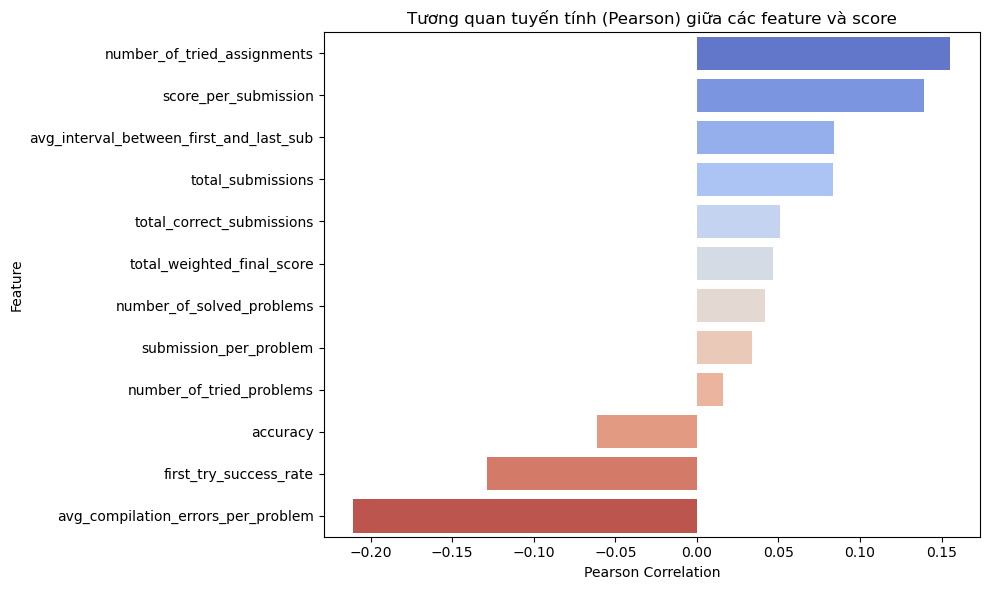

In [14]:
data_df["score"] = pd.to_numeric(data_df["score"], errors="coerce")


corr = (
    data_df.drop(columns=["username", "score"])
    .corrwith(data_df["score"], numeric_only=True)
    .sort_values(ascending=False)
)


plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Tương quan tuyến tính (Pearson) giữa các feature và score")
plt.xlabel("Pearson Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

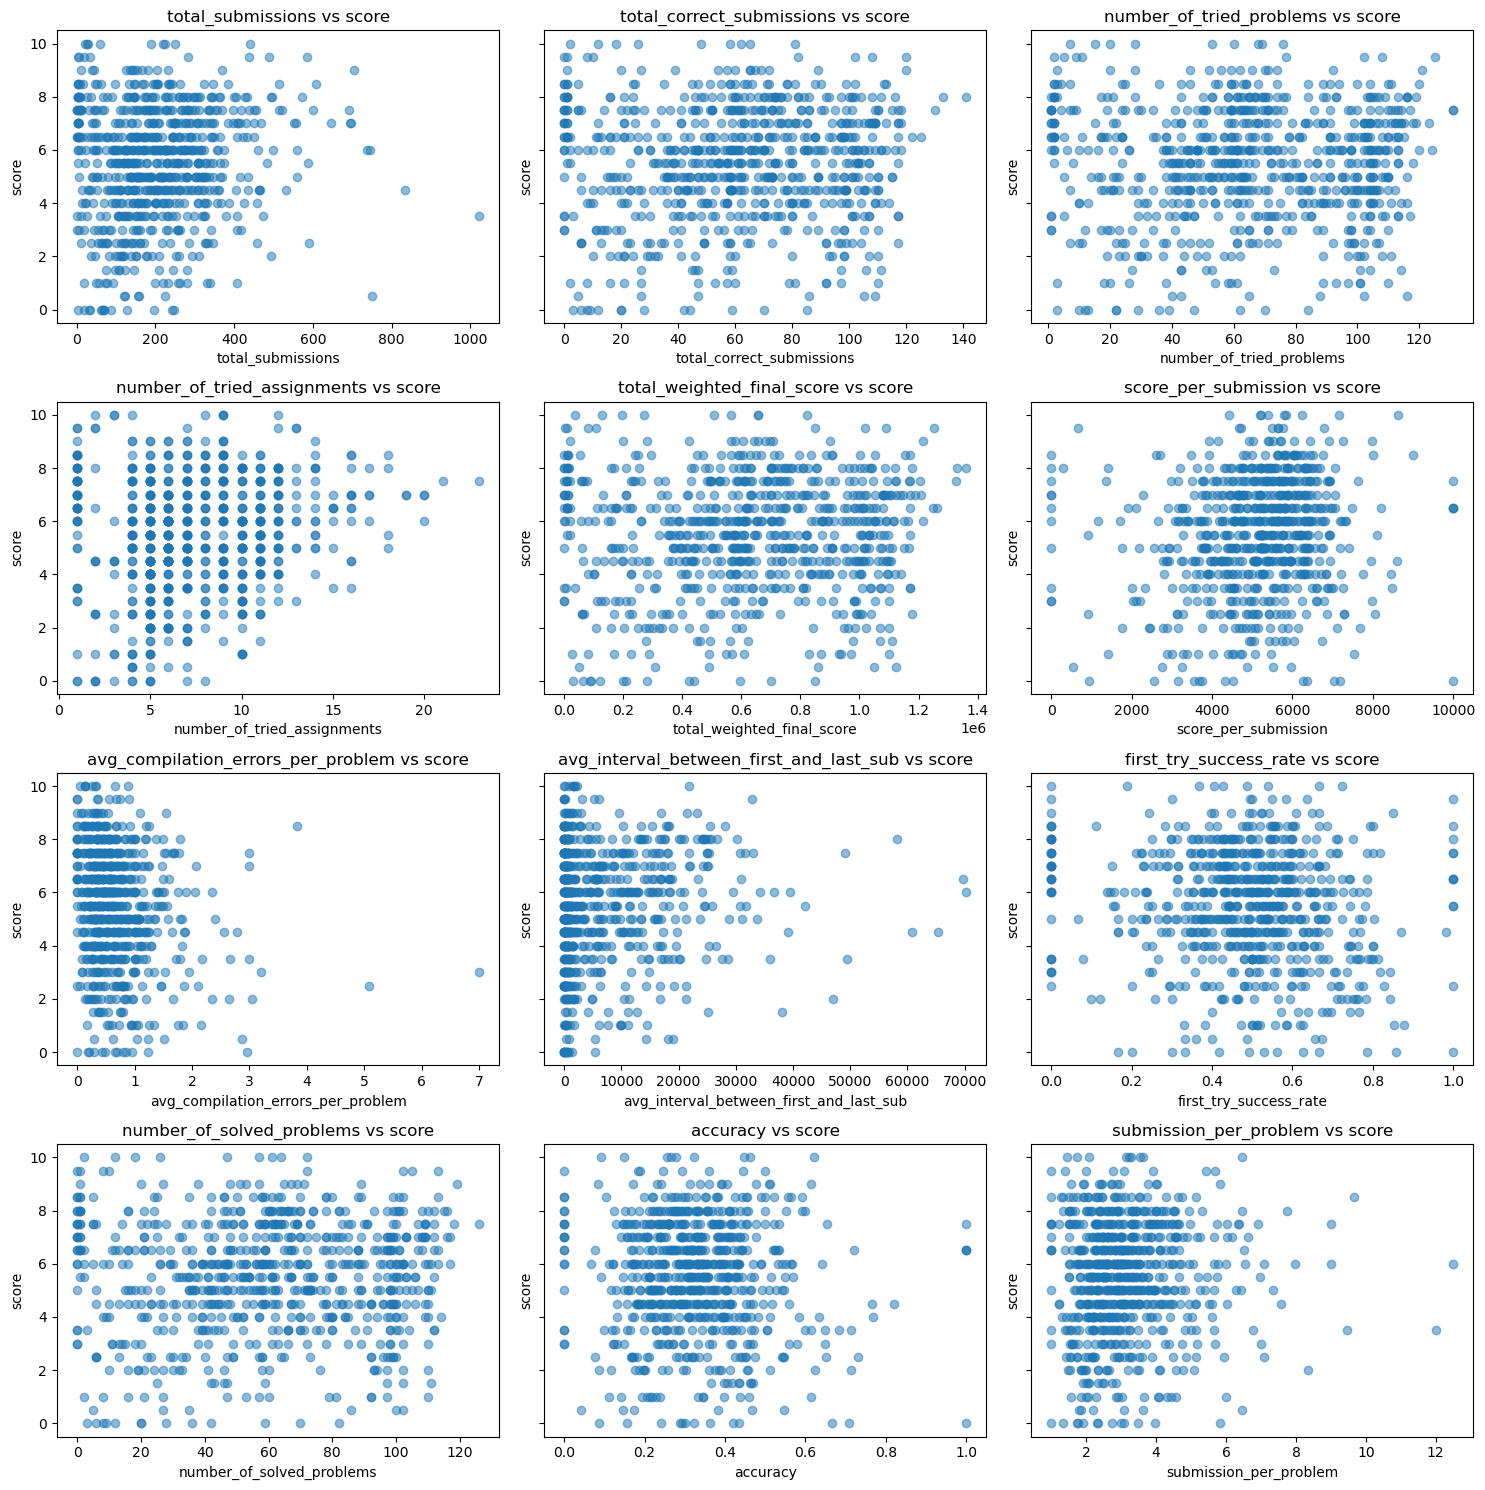

In [15]:
r, c = 4, (len(data_df.columns) - 2) // 4
fig, axes = plt.subplots(
    r,
    c,
    figsize=(15, 15),
    sharey=True,
)

for i, feature_col in enumerate(data_df.columns[1:-1]):
    axes[i // c, i % c].scatter(data_df[feature_col], data_df["score"], alpha=0.5)
    axes[i // c, i % c].set_title(f"{feature_col} vs {"score"}")
    axes[i // c, i % c].set_xlabel(feature_col)
    axes[i // c, i % c].set_ylabel("score")

plt.tight_layout()
plt.show()

## 4. Tiền xử lí dữ liệu

### 4.1. Xử lí dữ liệu khuyết thiếu và tách tập train, test

In [16]:
data_df = data_df.dropna()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 760
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   username                                 755 non-null    object 
 1   total_submissions                        755 non-null    int64  
 2   total_correct_submissions                755 non-null    int64  
 3   number_of_tried_problems                 755 non-null    int64  
 4   number_of_tried_assignments              755 non-null    int64  
 5   total_weighted_final_score               755 non-null    float64
 6   score_per_submission                     755 non-null    float64
 7   avg_compilation_errors_per_problem       755 non-null    float64
 8   avg_interval_between_first_and_last_sub  755 non-null    float64
 9   first_try_success_rate                   755 non-null    float64
 10  number_of_solved_problems                755 non-null  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    data_df.drop(columns=["username", "score"]),
    data_df["score"],
    test_size=0.1,
    random_state=42,
)

### 4.2. Xử lí chuẩn hóa dữ liệu

In [18]:
scaler = StandardScaler()

for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])
    extracted_wecode_df[col] = scaler.transform(extracted_wecode_df[[col]])

In [19]:
X_train.head(10)

,total_submissions,total_correct_submissions,number_of_tried_problems,number_of_tried_assignments,total_weighted_final_score,score_per_submission,avg_compilation_errors_per_problem,avg_interval_between_first_and_last_sub,first_try_success_rate,number_of_solved_problems,accuracy,submission_per_problem
576,1.829923,1.079841,1.154650,0.943928,1.109235,-0.471776,0.261458,1.280097,-0.383134,1.152871,-0.810732,0.958324
240,1.032508,0.678538,0.877746,-0.122063,0.653331,-1.249738,1.205287,5.581898,-0.230644,0.743721,-0.613427,0.421835
77,-0.452584,-0.185808,-0.168335,0.144435,-0.187720,0.474837,-0.536721,0.680136,0.386583,-0.137527,0.363416,-0.511216
281,0.747195,0.863755,0.970047,-0.122063,0.828625,-0.247201,0.156963,-0.032246,0.023880,0.932560,-0.269877,0.041740
73,-1.491417,-1.883630,-1.922060,-1.721049,-1.890247,-1.717804,-0.295851,-0.711015,-2.565321,-1.868549,-2.268079,-1.206932
223,0.483829,-0.432764,-0.322171,0.677430,-0.402845,-0.949833,1.221268,0.332323,-0.782428,-0.389312,-1.073697,1.376180
381,0.022938,-0.000591,-0.014500,-0.122063,-0.049654,0.107905,-0.165231,-0.647616,0.096231,0.051312,-0.252878,0.087147
168,-0.108745,-0.772328,-0.445239,-0.388561,-0.690830,-1.611293,0.673867,2.496565,-0.674092,-0.735516,-0.967283,0.493079
64,0.191200,-0.216677,-0.076034,0.144435,-0.182248,0.201749,-0.592483,-0.410569,-0.490185,-0.200473,-0.660228,0.433553
714,-1.491417,-1.852760,-1.922060,-1.721049,-1.875484,-0.617746,-1.131814,-0.711015,-2.565321,-1.837076,0.044447,-1.206932


In [20]:
X_test.head(10)

,total_submissions,total_correct_submissions,number_of_tried_problems,number_of_tried_assignments,total_weighted_final_score,score_per_submission,avg_compilation_errors_per_problem,avg_interval_between_first_and_last_sub,first_try_success_rate,number_of_solved_problems,accuracy,submission_per_problem
297,1.127613,0.524190,0.631609,-0.122063,0.576088,-0.782069,0.972846,-0.558775,-0.819571,0.586355,-0.769101,0.788807
542,0.315567,1.234188,1.154650,2.542913,1.212280,0.536420,-0.246676,-0.090370,0.185557,1.247291,0.534703,-0.516045
40,-0.086797,0.462451,0.447007,1.476923,0.474470,0.727681,-0.454578,-0.655993,-0.051442,0.491936,0.435798,-0.503422
78,1.698239,0.122887,0.108568,0.410932,0.089721,-0.481590,0.343415,-0.533126,-1.583337,0.145731,-1.240875,2.393518
499,-0.862264,-1.204501,-1.029814,-0.388561,-1.222604,-0.827806,0.216514,-0.577495,-0.422810,-1.176140,-0.553172,-0.210924
177,-1.176841,-1.204501,-1.245184,0.410932,-1.217659,1.222477,-0.922823,-0.692605,1.719700,-1.176140,1.049893,-0.904224
266,5.963307,1.265058,1.339252,2.276416,1.259753,-0.479039,2.506174,4.398525,-0.470422,1.278764,-1.575679,4.578163
362,0.981298,0.987233,1.000814,0.943928,1.010499,0.392342,0.057495,-0.557431,0.194089,1.058452,-0.376012,0.257303
593,-0.394058,0.061148,-0.045267,-0.921556,0.011476,1.334327,-0.760274,-0.667060,0.427392,0.114258,0.588571,-0.532325
683,-0.050219,1.172450,1.093116,-0.388561,1.141343,0.874935,-0.680394,0.365004,0.926178,1.247291,1.166022,-0.843682


## 5. Huấn luyện và đánh giá các mô hình dự đoán với tham số mặc định và tập train không chọn lọc đặc trưng

In [21]:
models = {}

### 5.1. Huấn luyện Linear Regression

In [22]:
models["lr"] = LinearRegression()
models["lr"].fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 5.2. Huấn luyện Support Vector Regressor

In [23]:
models["svr"] = SVR()
models["svr"].fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### 5.3. Huấn luyện Random Forest Regressor

In [24]:
models["rfr"] = RandomForestRegressor()
models["rfr"].fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5.4. Huấn luyện XGBoost Regressor

In [25]:
models["xgb"] = GradientBoostingRegressor()
models["xgb"].fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


### 5.5. Đánh giá các mô hình

#### 5.5.1. Đánh giá độ chính xác của mô hình thông qua tập test

In [26]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred = np.clip(y_pred, 0, 10)
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 of {name}: {r2:.4f}")

R^2 of lr: 0.2434
R^2 of svr: 0.2159
R^2 of rfr: 0.2421
R^2 of xgb: 0.1906


#### 5.5.2. Dự đoán điểm cho toàn bộ sinh viên và lưu kết quả

In [27]:
OUTPUT_DIR1 = BASE_OUTPUT_DIR + "no_feat_selection/"
X = extracted_wecode_df


def save_results_to_csv(X, model_name, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    y_pred = models[model_name].predict(X.drop(columns=["username"]))
    y_pred = np.clip(y_pred, 0, 10)
    results_df = pd.DataFrame(
        {
            "username": X["username"],
            "predicted_score": y_pred,
        }
    )
    results_df.to_csv(f"{output_dir}{model_name}_results.csv", index=False)


for name, model in models.items():
    save_results_to_csv(X, name, OUTPUT_DIR1)

## 6. Huấn luyện mô hình trên tập train đã chọn đặc trưng và đánh giá 

In [28]:
OUTPUT_DIR2 = BASE_OUTPUT_DIR + "rfecv_only/"
OUTPUT_DIR3 = BASE_OUTPUT_DIR + "sfs_only/"

rfecv_selected_features = {}
sfs_selected_features = {}

### 6.1. Định nghĩa một số hàm lựa chọn đặc trưng

#### 6.1.1. RFECV

In [29]:
def select_features_with_rfecv(
    X, y, model, cv=5, scoring="r2", n_jobs=-1, verbose=False
):
    rfecv = RFECV(
        estimator=model,
        min_features_to_select=1,
        step=1,
        cv=KFold(cv, shuffle=True, random_state=42),
        scoring=scoring,
        n_jobs=n_jobs,
        verbose=verbose,
    )

    rfecv.fit(X, y)

    selected_features = X.columns[rfecv.support_]
    best_n = rfecv.n_features_
    best_score = rfecv.cv_results_["mean_test_score"][best_n - 1]

    print(f"Optimal number of features: {best_n}")
    print("Selected features:", list(selected_features))
    print(f"Best CV R2 score: {best_score:.5f}")

    scores = rfecv.cv_results_["mean_test_score"]
    std_scores = rfecv.cv_results_["std_test_score"]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores) + 1), scores, label="Mean CV R2")
    plt.fill_between(
        range(1, len(scores) + 1),
        scores - std_scores,
        scores + std_scores,
        alpha=0.2,
        label="±1 std. dev",
    )
    plt.axvline(best_n, color="r", linestyle="--", label=f"Best: {best_n} features")
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross-validation R2 score")
    plt.legend()
    plt.show()

    return list(selected_features)

### 6.1.2. Forward/Backward Selection (Sequential Feature Selection) 

In [30]:
def select_features_with_sfs(X, y, model, cv=5, scoring="r2", n_jobs=-1, verbose=True):
    results = {}

    for direction in ["forward", "backward"]:
        sfs = SequentialFeatureSelector(
            model,
            direction=direction,
            scoring=scoring,
            cv=KFold(cv, shuffle=True, random_state=42),
            n_jobs=n_jobs,
        )
        sfs.fit(X, y)
        selected_features = X.columns[sfs.get_support()]

        X_selected = X[selected_features]
        score = cross_val_score(
            model, X_selected, y, cv=cv, scoring=scoring, n_jobs=n_jobs
        ).mean()

        results[direction] = {
            "features": selected_features,
            "score": score,
        }

        if verbose:
            print(
                f"[{direction.upper()}] CV R2: {score:.5f}, Features: {list(selected_features)}"
            )

    best = max(results.items(), key=lambda x: x[1]["score"])
    best_direction, best_info = best

    if verbose:
        print(
            f"\nBest Direction: {best_direction.upper()} with R2 = {best_info['score']:.5f}"
        )

    return list(best_info["features"])

### 6.2. Huấn luyện và đánh giá Linear Regression

#### 6.2.1. Huấn luyện và đánh giá với tập train được chọn lọc nhờ RFECV

Optimal number of features: 11
Selected features: ['total_submissions', 'total_correct_submissions', 'number_of_tried_problems', 'number_of_tried_assignments', 'total_weighted_final_score', 'score_per_submission', 'avg_compilation_errors_per_problem', 'first_try_success_rate', 'number_of_solved_problems', 'accuracy', 'submission_per_problem']
Best CV R2 score: 0.14102


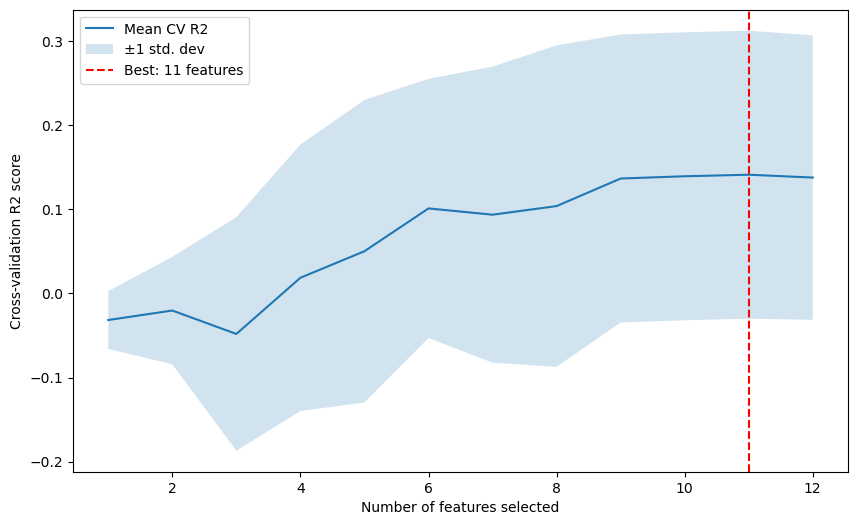

In [31]:
rfecv_selected_features["lr"] = select_features_with_rfecv(
    X_train, y_train, models["lr"]
)

In [32]:
selected_features = rfecv_selected_features["lr"]
models["lr"].fit(X_train[selected_features], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = models["lr"].predict(X_test[selected_features])
r2 = r2_score(y_test, y_pred)
print(f"R^2 of Linear Regression with features selected by RFECV: {r2:.4f}")

R^2 of Linear Regression with features selected by RFECV: 0.2442


In [34]:
save_results_to_csv(
    X[["username"] + selected_features],
    "lr",
    OUTPUT_DIR2,
)

#### 6.2.2. Huấn luyện và đánh giá với tập train được chọn lọc nhờ SFS

In [35]:
sfs_selected_features["lr"] = select_features_with_sfs(
    X_train,
    y_train,
    models["lr"],
)

[FORWARD] CV R2: 0.17090, Features: ['number_of_tried_problems', 'number_of_tried_assignments', 'score_per_submission', 'avg_compilation_errors_per_problem', 'first_try_success_rate', 'accuracy']
[BACKWARD] CV R2: 0.17090, Features: ['number_of_tried_problems', 'number_of_tried_assignments', 'score_per_submission', 'avg_compilation_errors_per_problem', 'first_try_success_rate', 'accuracy']

Best Direction: FORWARD with R2 = 0.17090


In [36]:
selected_features = sfs_selected_features["lr"]
models["lr"].fit(X_train[selected_features], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_pred = models["lr"].predict(X_test[selected_features])
r2 = r2_score(y_test, y_pred)
print(f"R^2 of Linear Regression with features selected by SFS: {r2:.4f}")

R^2 of Linear Regression with features selected by SFS: 0.1748


In [38]:
save_results_to_csv(
    X[["username"] + selected_features],
    "lr",
    OUTPUT_DIR3,
)

### 6.3. Huấn luyện và đánh giá Support Vector Regressor

#### Huấn luyện và đánh giá với tập train được chọn lọc nhờ SFS

Vì bản thân SVR của sklearn mặc định không hỗ trợ hoạt động với RFECV, thế nên đối với SVR ta chỉ xét tập train chọn lọc nhờ SFS

In [39]:
sfs_selected_features["svr"] = select_features_with_sfs(
    X_train,
    y_train,
    models["svr"],
)

[FORWARD] CV R2: 0.23064, Features: ['total_submissions', 'number_of_tried_problems', 'number_of_tried_assignments', 'total_weighted_final_score', 'avg_compilation_errors_per_problem', 'first_try_success_rate']
[BACKWARD] CV R2: 0.22981, Features: ['number_of_tried_problems', 'number_of_tried_assignments', 'avg_compilation_errors_per_problem', 'first_try_success_rate', 'number_of_solved_problems', 'submission_per_problem']

Best Direction: FORWARD with R2 = 0.23064


In [40]:
selected_features = sfs_selected_features["svr"]
models["svr"].fit(X_train[selected_features], y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [41]:
y_pred = models["svr"].predict(X_test[selected_features])
r2 = r2_score(y_test, y_pred)
print(f"R^2 of SVR with features selected by SFS: {r2:.4f}")

R^2 of SVR with features selected by SFS: 0.2417


In [42]:
save_results_to_csv(
    X[["username"] + selected_features],
    "svr",
    OUTPUT_DIR3,
)

### 6.4. Huấn luyện và đánh giá Random Forest Regressor

#### 6.4.1. Huấn luyện và đánh giá với tập train được chọn lọc nhờ RFECV

Optimal number of features: 9
Selected features: ['total_submissions', 'number_of_tried_assignments', 'total_weighted_final_score', 'score_per_submission', 'avg_compilation_errors_per_problem', 'avg_interval_between_first_and_last_sub', 'first_try_success_rate', 'accuracy', 'submission_per_problem']
Best CV R2 score: 0.22653


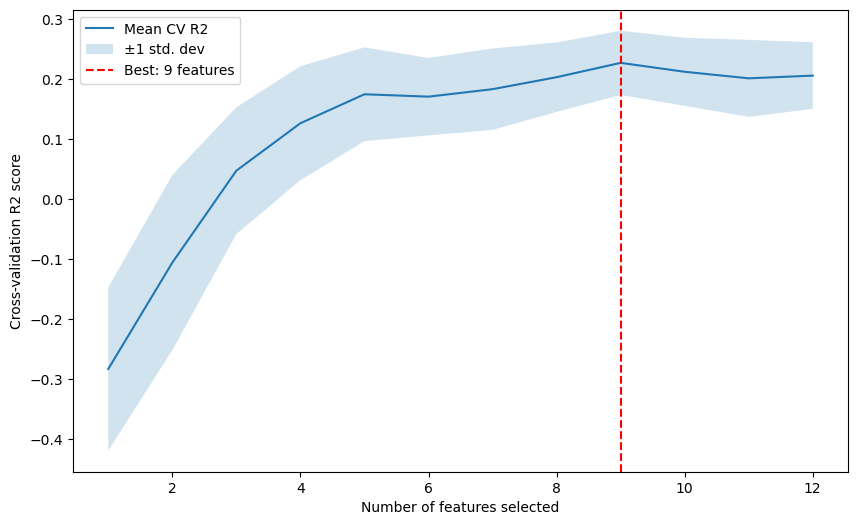

In [43]:
rfecv_selected_features["rfr"] = select_features_with_rfecv(
    X_train, y_train, models["rfr"]
)

In [44]:
selected_features = rfecv_selected_features["rfr"]
models["rfr"].fit(X_train[selected_features], y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_pred = models["rfr"].predict(X_test[selected_features])
r2 = r2_score(y_test, y_pred)
print(f"R^2 of Random Forest Regressor with features selected by RFECV: {r2:.4f}")

R^2 of Random Forest Regressor with features selected by RFECV: 0.2336


In [46]:
save_results_to_csv(
    X[["username"] + selected_features],
    "rfr",
    OUTPUT_DIR2,
)

#### 6.4.2. Huấn luyện và đánh giá với tập train được chọn lọc nhờ SFS

In [47]:
sfs_selected_features["rfr"] = select_features_with_sfs(X_train, y_train, models["rfr"])

[FORWARD] CV R2: 0.17252, Features: ['number_of_tried_problems', 'number_of_tried_assignments', 'score_per_submission', 'avg_compilation_errors_per_problem', 'first_try_success_rate', 'submission_per_problem']
[BACKWARD] CV R2: 0.15596, Features: ['number_of_tried_problems', 'number_of_tried_assignments', 'score_per_submission', 'avg_interval_between_first_and_last_sub', 'first_try_success_rate', 'accuracy']

Best Direction: FORWARD with R2 = 0.17252


In [48]:
selected_features = sfs_selected_features["rfr"]
models["rfr"].fit(X_train[selected_features], y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
y_pred = models["rfr"].predict(X_test[selected_features])
r2 = r2_score(y_test, y_pred)
print(f"R^2 of Random Forest Regressor with features selected by SFS: {r2:.4f}")

R^2 of Random Forest Regressor with features selected by SFS: 0.1836


In [50]:
save_results_to_csv(
    X[["username"] + selected_features],
    "rfr",
    OUTPUT_DIR3,
)

### 6.4. Huấn luyện và đánh giá XGBoost Regressor

#### 6.4.1. Huấn luyện và đánh giá với tập train được chọn lọc nhờ RFECV

Optimal number of features: 12
Selected features: ['total_submissions', 'total_correct_submissions', 'number_of_tried_problems', 'number_of_tried_assignments', 'total_weighted_final_score', 'score_per_submission', 'avg_compilation_errors_per_problem', 'avg_interval_between_first_and_last_sub', 'first_try_success_rate', 'number_of_solved_problems', 'accuracy', 'submission_per_problem']
Best CV R2 score: 0.21855


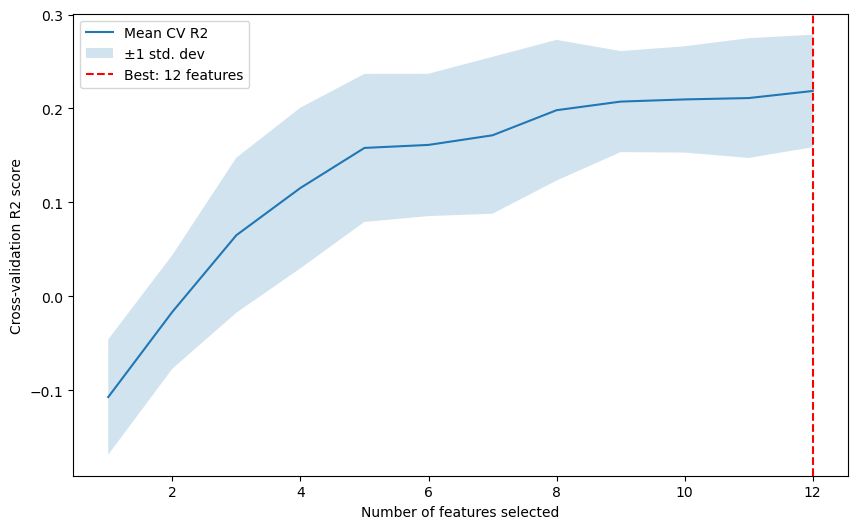

In [51]:
rfecv_selected_features["xgb"] = select_features_with_rfecv(
    X_train, y_train, models["xgb"]
)

In [52]:
selected_features = rfecv_selected_features["xgb"]
models["xgb"].fit(X_train[selected_features], y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [53]:
y_pred = models["xgb"].predict(X_test[selected_features])
r2 = r2_score(y_test, y_pred)
print(f"R^2 of XGBoost Regressor with features selected by RFECV: {r2:.4f}")

R^2 of XGBoost Regressor with features selected by RFECV: 0.1966


In [54]:
save_results_to_csv(
    X[["username"] + selected_features],
    "xgb",
    OUTPUT_DIR2,
)

#### 6.4.2. Huấn luyện và đánh giá với tập train được chọn lọc nhờ SFS

In [55]:
sfs_selected_features["xgb"] = select_features_with_sfs(X_train, y_train, models["xgb"])

[FORWARD] CV R2: 0.17121, Features: ['total_correct_submissions', 'number_of_tried_problems', 'number_of_tried_assignments', 'score_per_submission', 'first_try_success_rate', 'accuracy']
[BACKWARD] CV R2: 0.19526, Features: ['total_correct_submissions', 'number_of_tried_problems', 'number_of_tried_assignments', 'avg_compilation_errors_per_problem', 'first_try_success_rate', 'accuracy']

Best Direction: BACKWARD with R2 = 0.19526


In [56]:
selected_features = sfs_selected_features["xgb"]
models["xgb"].fit(X_train[selected_features], y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [57]:
y_pred = models["xgb"].predict(X_test[selected_features])
r2 = r2_score(y_test, y_pred)
print(f"R^2 of XGBoot Regressor with features selected by SFS: {r2:.4f}")

R^2 of XGBoot Regressor with features selected by SFS: 0.2082


In [58]:
save_results_to_csv(
    X[["username"] + selected_features],
    "xgb",
    OUTPUT_DIR3,
)

## 7. Tinh chỉnh tham số mô hình và đánh giá

Chuẩn bị các khoảng phân phối của các tham số cần tinh chỉnh

In [59]:
OUTPUT_DIR4 = BASE_OUTPUT_DIR + "fine_tuned/no_feat_selection/"
OUTPUT_DIR5 = BASE_OUTPUT_DIR + "fine_tuned/rfecv/"
OUTPUT_DIR6 = BASE_OUTPUT_DIR + "fine_tuned/sfs/"
NUMBER_OF_SEPARATOR = 200

params_distribution = {
    "svr": {
        "C": uniform(1e-1, 100),
        "epsilon": uniform(0.01, 1.0),
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"],
        "degree": list(range(2, 6)),
    },
    "rfr": {
        "n_estimators": list(range(50, 1001)),
        "max_depth": list(range(3, 31)),
        "min_samples_split": list(range(2, 11)),
        "min_samples_leaf": list(range(1, 11)),
        "max_features": ["auto", "sqrt", "log2"],
        "bootstrap": [True, False],
    },
    "xgb": {
        "n_estimators": list(range(50, 301)),
        "learning_rate": uniform(0.01, 0.3),
        "max_depth": list(range(3, 16)),
        "subsample": uniform(0.5, 0.5),
    },
}

### 7.1. Tinh chỉnh tham số, huấn luyện và đánh giá mô hình trên các đặc trưng gốc chưa qua chọn lọc

In [60]:
for name, model in models.items():
    if name == "lr":
        print("Skipping Linear Regression as it does not require fine-tuning.")
        print("-" * NUMBER_OF_SEPARATOR)
        continue
    print(f"Fine-tuning {name}...")

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params_distribution[name],
        n_iter=100,
        cv=KFold(5, shuffle=True, random_state=42),
        scoring="r2",
        n_jobs=-1,
        random_state=42,
        verbose=0,
    )

    random_search.fit(X_train, y_train)

    print("Best parameters found:", random_search.best_params_)
    print("Best CV score:", random_search.best_score_)

    models[name] = random_search.best_estimator_
    y_pred = models[name].predict(X_test)
    y_pred = np.clip(y_pred, 0, 10)
    r2 = r2_score(y_test, y_pred)
    print(f"✅ R^2 of {name} after fine-tuning with best params: {r2:.4f}")

    save_results_to_csv(X, name, OUTPUT_DIR4)

    print("-" * NUMBER_OF_SEPARATOR)

Skipping Linear Regression as it does not require fine-tuning.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fine-tuning svr...
Best parameters found: {'C': np.float64(2.7511310541621814), 'degree': 5, 'epsilon': np.float64(0.6464035974460113), 'gamma': 'auto', 'kernel': 'rbf'}
Best CV score: 0.23399424772109606
✅ R^2 of svr after fine-tuning with best params: 0.2585
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fine-tuning rfr...


/usr/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
79 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.13/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/usr/lib/python3.13/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  

Best parameters found: {'n_estimators': 888, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 27, 'bootstrap': True}
Best CV score: 0.21868354716541677
✅ R^2 of rfr after fine-tuning with best params: 0.2409
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fine-tuning xgb...
Best parameters found: {'learning_rate': np.float64(0.04661147045343365), 'max_depth': 15, 'n_estimators': 57, 'subsample': np.float64(0.5171942605576092)}
Best CV score: 0.24050643541668143
✅ R^2 of xgb after fine-tuning with best params: 0.1936
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### 7.2. Tinh chỉnh tham số, huấn luyện và đánh giá mô hình trên các đặc trưng được chọn từ RFECV

In [61]:
for name, model in models.items():
    if name == "lr":
        print("Skipping Linear Regression as it does not require fine-tuning.")
        print("-" * NUMBER_OF_SEPARATOR)
        continue
    if name not in rfecv_selected_features:
        print("Skipping SVR as it does not have features selected by RFECV.")
        print("-" * NUMBER_OF_SEPARATOR)
        continue

    print(f"Fine-tuning {name}...")

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params_distribution[name],
        n_iter=100,
        cv=KFold(5, shuffle=True, random_state=42),
        scoring="r2",
        n_jobs=-1,
        random_state=42,
        verbose=0,
    )

    cols = rfecv_selected_features[name]

    random_search.fit(X_train[cols], y_train)

    print("Best parameters found:", random_search.best_params_)
    print("Best CV score:", random_search.best_score_)

    models[name] = random_search.best_estimator_
    y_pred = models[name].predict(X_test[cols])
    y_pred = np.clip(y_pred, 0, 10)
    r2 = r2_score(y_test, y_pred)
    print(f"✅ R^2 of {name} after fine-tuning with best params: {r2:.4f}")

    save_results_to_csv(X[cols + ["username"]], name, OUTPUT_DIR5)

    print("-" * NUMBER_OF_SEPARATOR)

Skipping Linear Regression as it does not require fine-tuning.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Skipping SVR as it does not have features selected by RFECV.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fine-tuning rfr...


/usr/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.13/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/usr/lib/python3.13/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  

Best parameters found: {'n_estimators': 888, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 27, 'bootstrap': True}
Best CV score: 0.22805009507618507
✅ R^2 of rfr after fine-tuning with best params: 0.2266
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fine-tuning xgb...
Best parameters found: {'learning_rate': np.float64(0.02550451635058231), 'max_depth': 6, 'n_estimators': 143, 'subsample': np.float64(0.7703175608050532)}
Best CV score: 0.23038975654024174
✅ R^2 of xgb after fine-tuning with best params: 0.2354
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### 7.3. Tinh chỉnh tham số, huấn luyện và đánh giá mô hình trên các đặc trưng được chọn từ SFS

In [ ]:
for name, model in models.items():

    if name == "lr":
        print("Skipping Linear Regression as it does not require fine-tuning.")
        print("-" * NUMBER_OF_SEPARATOR)
        continue
    print(f"Fine-tuning {name}...")

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params_distribution[name],
        n_iter=100,
        cv=KFold(5, shuffle=True, random_state=42),
        scoring="r2",
        n_jobs=-1,
        random_state=42,
        verbose=0,
    )

    cols = sfs_selected_features[name]

    random_search.fit(X_train[cols], y_train)

    print("Best parameters found:", random_search.best_params_)
    print("Best CV score:", random_search.best_score_)

    models[name] = random_search.best_estimator_
    y_pred = models[name].predict(X_test[cols])
    y_pred = np.clip(y_pred, 0, 10)
    r2 = r2_score(y_test, y_pred)
    print(f"✅ R^2 of {name} after fine-tuning with best params: {r2:.4f}")

    save_results_to_csv(X[cols + ["username"]], name, OUTPUT_DIR6)
    print("-" * NUMBER_OF_SEPARATOR)

Skipping Linear Regression as it does not require fine-tuning.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fine-tuning svr...
Best parameters found: {'C': np.float64(1.426496115986653), 'degree': 2, 'epsilon': np.float64(0.9756320330745594), 'gamma': 'auto', 'kernel': 'rbf'}
Best CV score: 0.23310187000286767
✅ R^2 of svr after fine-tuning with best params: 0.2474
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fine-tuning rfr...


/usr/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.13/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/usr/lib/python3.13/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  

Best parameters found: {'n_estimators': 217, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 22, 'bootstrap': True}
Best CV score: 0.2145212318745696
✅ R^2 of rfr after fine-tuning with best params: 0.2227
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fine-tuning xgb...
Best parameters found: {'learning_rate': np.float64(0.014223946814525337), 'max_depth': 5, 'n_estimators': 130, 'subsample': np.float64(0.855670976374325)}
Best CV score: 0.18956941796991217
✅ R^2 of xgb after fine-tuning with best params: 0.1972
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Exception ignored in: <function ResourceTracker.__del__ at 0x7ff5bf292b60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7fd70baa6b60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f09be59eb60>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/reso